In [2]:
import fitsio as fio
import redmapper
import pandas as pd
import numpy as np
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
import os.path
%matplotlib inline


sns.set_theme()
sns.set_style('ticks')
sns.set(rc = {'figure.figsize':(15,8)})

project_path = "/global/cfs/cdirs/des/zhou/spt_lensing/"

projection_depth = 30

/global/homes/z/zchusre/.conda/envs/desdesi/lib/python3.8/site-packages/pyfits/__init__.py:21: PyFITSDeprecationWarning: PyFITS is deprecated, please use astropy.io.fits
  warnings.warn('PyFITS is deprecated, please use astropy.io.fits',


In [3]:
halo_df_path=os.path.join(project_path,"data/lambda_spt_combined.pkl")
df = pd.read_pickle(halo_df_path)

In [4]:
projection_depth="30"

In [5]:
d30_mask= (~np.isnan(df[f"lambda_{projection_depth}"])) & (~np.isnan(df['pos_x']))

In [6]:
halo_df=df[d30_mask]

In [7]:
sns.set_style('ticks')

In [8]:
font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : 25}

matplotlib.rc('font', **font)

In [9]:
halo_df_zgt_2 = halo_df[halo_df['zeta_gt_2']==1]

In [10]:
lambda_st_20 = halo_df_zgt_2[halo_df_zgt_2['lambda_30']<20]
lambda_gt_20 = halo_df_zgt_2[halo_df_zgt_2['lambda_30']>20]

findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.
findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.


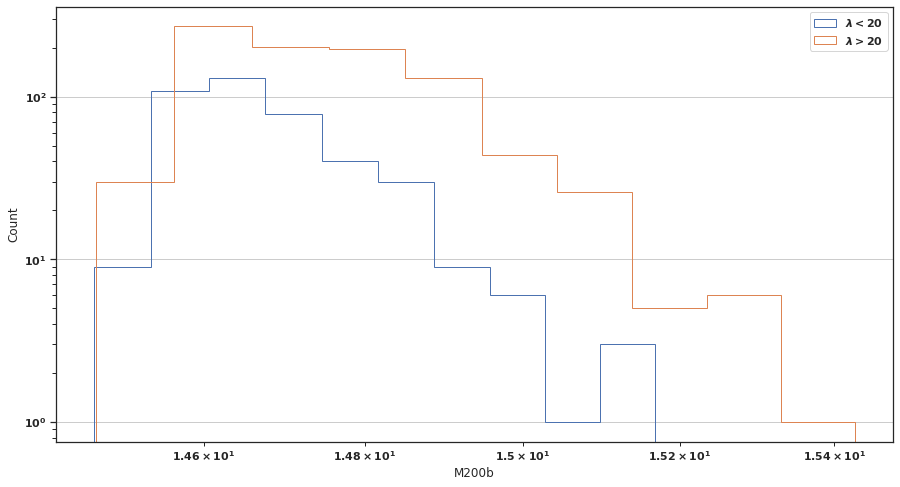

In [11]:
hist = np.log10(lambda_st_20['M200b']).hist(histtype="step",label=r"$\lambda < 20$",log=True)
hist = np.log10(lambda_gt_20['M200b']).hist(histtype="step",label=r"$\lambda > 20$",log=True)
hist.set_xscale('log')
hist.set_yscale('log')
hist.set_xlabel('M200b')
hist.set_ylabel('Count')
hist.legend()

In [12]:
print(len(halo_df_zgt_2))

1404


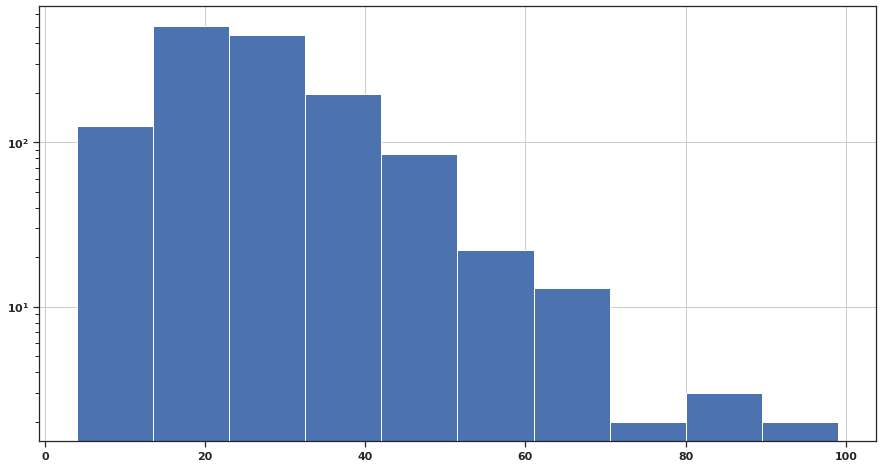

In [13]:
halo_df_zgt_2['lambda_30'].hist(log=True)

In [14]:
np.sum(halo_df_zgt_2['lambda_30']==0)/len(halo_df)

0.0

In [15]:
lambda_lowest = halo_df_zgt_2['lambda_30'].min()
lambda_highest = halo_df_zgt_2['lambda_30'].max()
bin_edges = np.exp(np.linspace(np.log(lambda_lowest),np.log(lambda_highest),5))
print(lambda_lowest,lambda_highest)
print(bin_edges)

4.0 99.0
[ 4.          8.92182689 19.89974874 44.38552833 99.        ]


In [16]:
bins = pd.cut(halo_df_zgt_2['lambda_30'],bin_edges)
print(bins)

107        (19.9, 44.386]
273        (19.9, 44.386]
329        (44.386, 99.0]
466        (19.9, 44.386]
582        (19.9, 44.386]
                ...      
9250915    (19.9, 44.386]
9250915    (19.9, 44.386]
9250915    (19.9, 44.386]
9250915    (19.9, 44.386]
9252098     (8.922, 19.9]
Name: lambda_30, Length: 1404, dtype: category
Categories (4, interval[float64]): [(4.0, 8.922] < (8.922, 19.9] < (19.9, 44.386] < (44.386, 99.0]]


In [17]:
select = halo_df_zgt_2.groupby(bins).sum()['select']
print(select)

lambda_30
(4.0, 8.922]        3.0
(8.922, 19.9]      66.0
(19.9, 44.386]    323.0
(44.386, 99.0]     44.0
Name: select, dtype: float64


In [18]:
size = halo_df_zgt_2.groupby(bins).size()
print(size)

lambda_30
(4.0, 8.922]       26
(8.922, 19.9]     388
(19.9, 44.386]    893
(44.386, 99.0]     95
dtype: int64


In [19]:
select/size

lambda_30
(4.0, 8.922]      0.115385
(8.922, 19.9]     0.170103
(19.9, 44.386]    0.361702
(44.386, 99.0]    0.463158
dtype: float64

In [20]:
np.sum(halo_df_zgt_2['select'])

437.0

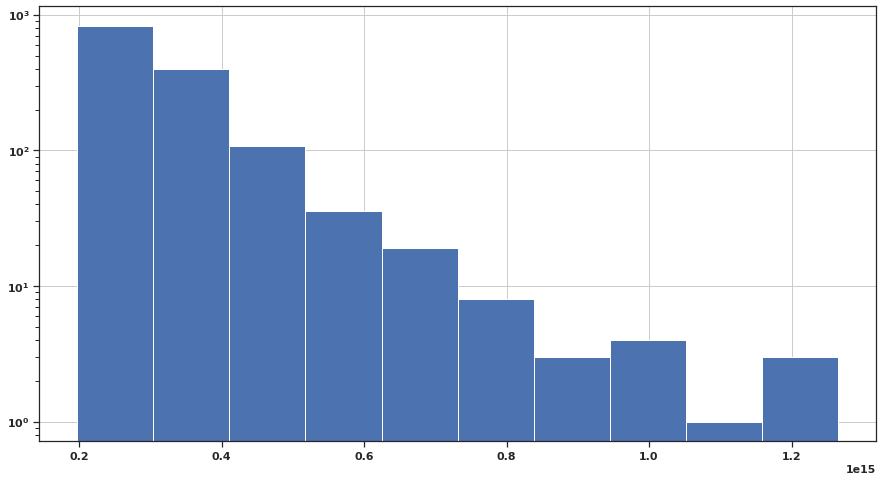

In [21]:
halo_df_zgt_2['M500c'].hist(log=True)

findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.


[20,30],all:596
[20,30],SPT:208
[20,30],nonSPT:388
[30,45],all:347
[30,45],SPT:133
[30,45],nonSPT:214
[45,60],all:76
[45,60],SPT:38
[45,60],nonSPT:38
[60,inf],all:21
[60,inf],SPT:7
[60,inf],nonSPT:14


findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.


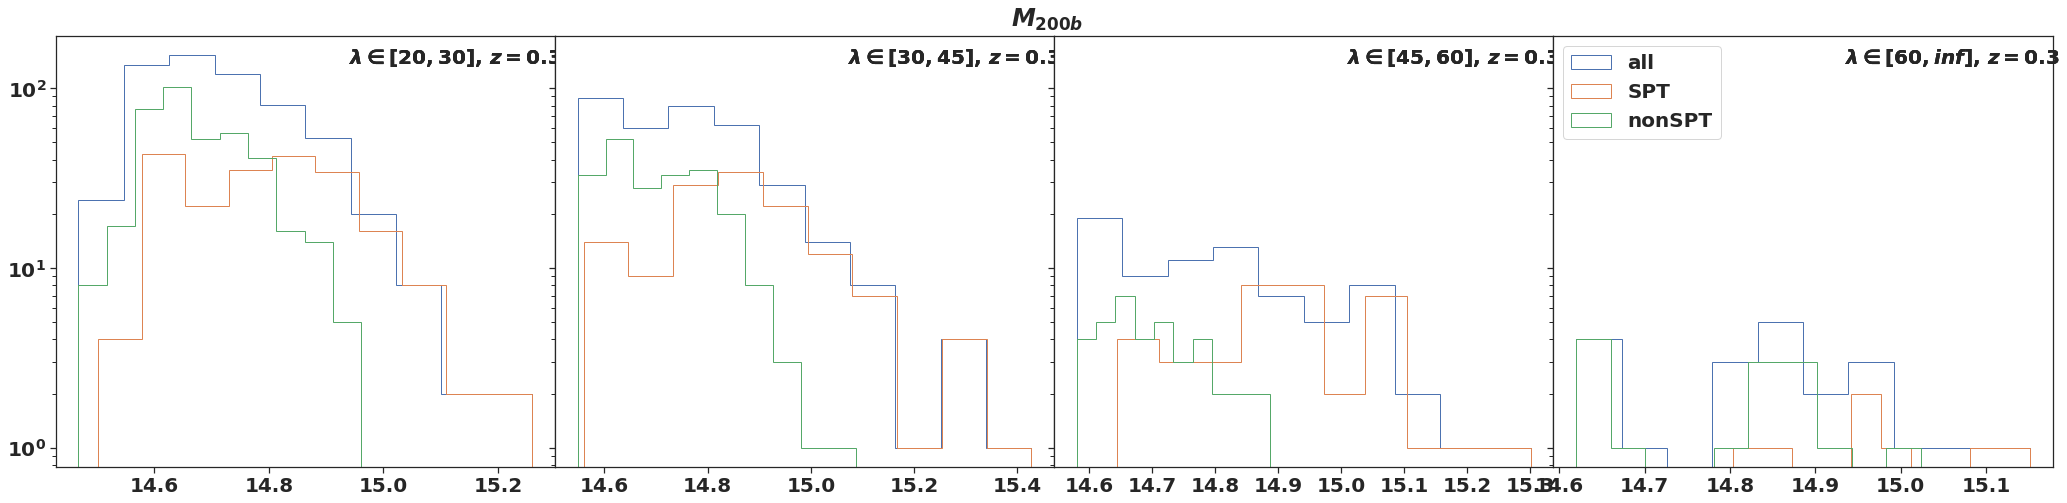

In [22]:
fig,axes = plt.subplots(ncols=4, figsize = [30,7.5],sharey=True)

modes = ["all","SPT","nonSPT"]
richness_bins=[5,10,14,20,30,45,60,np.inf]

plt.rcParams.update({'font.size':20})


for i in range(len(richness_bins))[-5:-1]:
    lambda_lower, lambda_upper = richness_bins[i],richness_bins[i+1]
    for j,mode in enumerate(modes):
        ax = axes[i-3]
        ax.text(0.80, 0.95, rf'$\lambda \in [{lambda_lower},{lambda_upper}]$, $z=0.3$', horizontalalignment='center', verticalalignment='center', transform=ax.transAxes)
        # print(i-3,j)
        
        
        
        # plot1 = sns.lineplot(x=0.5*(DSigma[0]+DSigma[1]),y=DSigma[2],label=mode,ax=axes[i-3],legend=False)
        if mode == "all":
            color_= "r"
            halo_df_spt_masked = halo_df_zgt_2
        elif mode == "SPT":
            color_ = "g"
            halo_df_spt_masked =halo_df_zgt_2[halo_df_zgt_2['select']==1]
        elif mode == "nonSPT":
            color_ = "b"
            halo_df_spt_masked = halo_df_zgt_2[halo_df_zgt_2['select']==0]
            
        df_to_use = halo_df_spt_masked[(halo_df_spt_masked['lambda_30'] >= lambda_lower)&(halo_df_spt_masked['lambda_30'] <= lambda_upper)]
        
        print(rf"[{lambda_lower},{lambda_upper}],{mode}:{len(df_to_use)}")
        
        ax.hist(np.log10(df_to_use['M200b']),label=mode, histtype="step") ## Histogram 
        
        ax.set_yscale('log') 
        # ax.set_xscale('log')
        # ax.set_ylim(0.01,1E3)
        # print(np.mean(DSigma[2]))
        # plot1.set(xscale="log",yscale="log",ylim=(0.01,1000))
        # plot2.set(xscale="log",yscale="log",ylim=(0.01,1E3))
        # plot2.legend(loc="lower left")
        ax.tick_params(axis='x', labelsize=20)
        ax.tick_params(axis='y', labelsize=20)
        
axes[3].legend(loc="upper left",prop={'size':20})
    
# fig.get_axes()[0].annotate(r'$\Delta \Sigma$', (0.5, 0.95), 
#                             xycoords='figure fraction', ha='center', 
#                             fontsize=15
#                             )

fig.suptitle(r"$M_{200b}$")
fig.tight_layout(pad=2)

plt.subplots_adjust(wspace=0)

In [23]:
halo_df_path = "data/lambda_spt_combined_30_zgt_2.pkl"
halo_df = pd.read_pickle(os.path.join(project_path,halo_df_path))

In [24]:
len(halo_df)

1404

[20,30],all:596
[20,30],SPT:208
[20,30],nonSPT:388
[30,45],all:347
[30,45],SPT:133
[30,45],nonSPT:214
[45,60],all:76
[45,60],SPT:38
[45,60],nonSPT:38
[60,inf],all:21
[60,inf],SPT:7
[60,inf],nonSPT:14


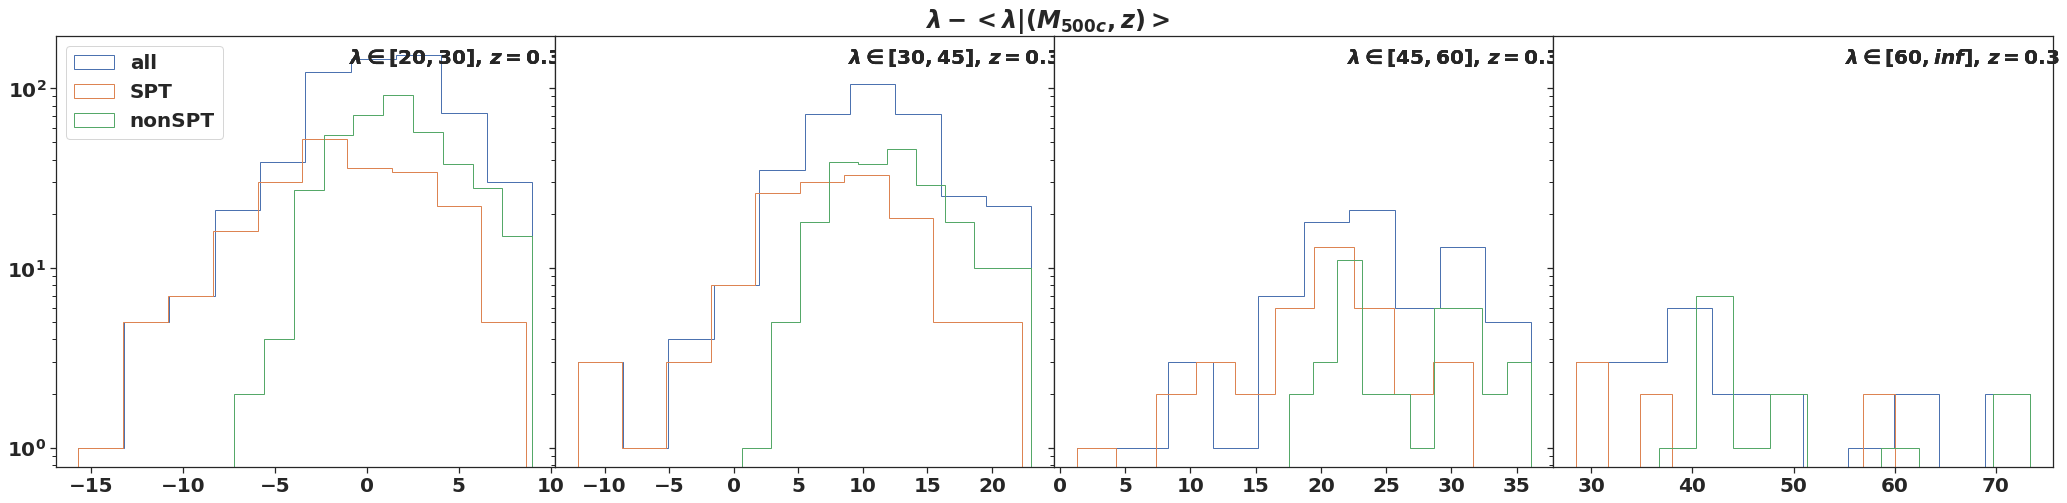

In [30]:
fig,axes = plt.subplots(ncols=4, figsize = [30,7.5],sharey=True)

modes = ["all","SPT","nonSPT"]
richness_bins=[5,10,14,20,30,45,60,np.inf]

plt.rcParams.update({'font.size':20})

halo_df_zgt_2 = halo_df[halo_df['zeta_gt_2']==1]

for i in range(len(richness_bins))[-5:-1]:
    lambda_lower, lambda_upper = richness_bins[i],richness_bins[i+1]
    for j,mode in enumerate(modes):
        ax = axes[i-3]
        ax.text(0.80, 0.95, rf'$\lambda \in [{lambda_lower},{lambda_upper}]$, $z=0.3$', horizontalalignment='center', verticalalignment='center', transform=ax.transAxes)
        # print(i-3,j)
        
        
        
        # plot1 = sns.lineplot(x=0.5*(DSigma[0]+DSigma[1]),y=DSigma[2],label=mode,ax=axes[i-3],legend=False)
        if mode == "all":
            color_= "r"
            halo_df_spt_masked = halo_df_zgt_2
        elif mode == "SPT":
            color_ = "g"
            halo_df_spt_masked =halo_df_zgt_2[halo_df_zgt_2['select']==1]
        elif mode == "nonSPT":
            color_ = "b"
            halo_df_spt_masked = halo_df_zgt_2[halo_df_zgt_2['select']==0]
            
        df_to_use = halo_df_spt_masked[(halo_df_spt_masked['lambda_30'] >= lambda_lower)&(halo_df_spt_masked['lambda_30'] <= lambda_upper)]
        
        print(rf"[{lambda_lower},{lambda_upper}],{mode}:{len(df_to_use)}")
        
        ax.hist(df_to_use['lambda_30'] - np.exp(df_to_use['mean_ln_lambda_30']),label=mode, histtype="step") ## Histogram 
        
        ax.set_yscale('log') 
        # ax.set_xscale('log')
        # ax.set_ylim(0.01,1E3)
        # print(np.mean(DSigma[2]))
        # plot1.set(xscale="log",yscale="log",ylim=(0.01,1000))
        # plot2.set(xscale="log",yscale="log",ylim=(0.01,1E3))
        # plot2.legend(loc="lower left")
        ax.tick_params(axis='x', labelsize=20)
        ax.tick_params(axis='y', labelsize=20)
        
axes[0].legend(loc="upper left",prop={'size':20})
    
# fig.get_axes()[0].annotate(r'$\Delta \Sigma$', (0.5, 0.95), 
#                             xycoords='figure fraction', ha='center', 
#                             fontsize=15
#                             )

fig.suptitle(r"$ \lambda - <\lambda|(M_{500c},z)>$")
fig.tight_layout(pad=2)

plt.subplots_adjust(wspace=0)